Downloading Required Packages ( *** Do not run this if you already downloaded the files ***)


In [2]:
!git clone https://github.com/facebookresearch/fastText.git
!wget https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
!gunzip /content/cc.fa.300.bin.gz

Cloning into 'fastText'...
remote: Enumerating objects: 3946, done.
remote: Counting objects: 100% (974/974), done.
remote: Compressing objects: 100% (153/153), done.
remote: Total 3946 (delta 872), reused 831 (delta 820), pack-reused 2972
Receiving objects: 100% (3946/3946), 8.25 MiB | 13.46 MiB/s, done.
Resolving deltas: 100% (2510/2510), done.
--2023-07-02 07:21:10--  https://dl.fbaipublicfiles.com/fasttext/vectors-crawl/cc.fa.300.bin.gz
Resolving dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)... 99.84.160.80, 99.84.160.46, 99.84.160.108, ...
Connecting to dl.fbaipublicfiles.com (dl.fbaipublicfiles.com)|99.84.160.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4502524724 (4.2G) [application/octet-stream]
Saving to: ‘cc.fa.300.bin.gz’

cc.fa.300.bin.gz    100%[===================>]   4.19G   215MB/s    in 18s     

2023-07-02 07:21:28 (233 MB/s) - ‘cc.fa.300.bin.gz’ saved [4502524724/4502524724]



Installing the requirements

In [3]:
!pip install hazm
!pip install emoji --upgrade
!pip install tqdm
!sudo pip install fastText/.

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 349.7/349.7 kB 7.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 993.5/993.5 kB 40.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 356.6/356.6 kB 8.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for emoji: filename=emoji-2.6.0-py2.py3-none-any.whl size=351311 sha256=ba7b776ecd50104e68dc3c924e2b7692bbe2e03ba854b82e4d4dfe0eba4b6f78
  Stored in directory: /root/.cache/pip/wheels/ea/0b/64/114bc939d0083621aa41521e21be246c888260b8aa21e6c1ad
Successfully built emoji
Processing ./fastText
  Preparing metadata (setup.py) ... done
  Using cached pybind11-2.10.4-py3-none-any.whl (222 kB)
  Created wheel for fasttext: filename=fasttext-0.9.2-cp310-cp310-linux_x86_64.whl size=4384288 sha256=b75df596c57900a0068f8aa0a42775ed0b15ee78572e4e31f1b4462d637ec36d
  Stored in directory: /tmp/pip-ephem-wheel-cache-og7moera/wheels/8b/05/af/3cfae069d904597d44b309c956601b611bdf8967bcbe968903
Successfully buil

Loading all the required packages


In [4]:
# Mounting Google drive
from google.colab import drive

# For browsing into different folders
import os

# progress bar
from tqdm import tqdm # progress bar
import time

# Toolkit packages
import random as rnd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handliing text
import hazm
import string
import emoji
import csv, re, pickle

# FastText
import fasttext.util

# Statistics package
from sklearn.manifold import TSNE
from sklearn.utils import shuffle, resample
from sklearn.model_selection import KFold, StratifiedKFold, train_test_split
from sklearn.metrics import roc_auc_score, f1_score, confusion_matrix, roc_curve
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report,f1_score

# Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense,Dropout,Embedding,LSTM,Conv1D, GlobalMaxPooling1D,Flatten,MaxPooling1D,GRU,SpatialDropout1D,Bidirectional, LSTM

#Some other packages
import functools
import operator
import gc
import pickle


pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)
pd.set_option('display.max_colwidth',-1)

<ipython-input-4-7378f80f6810>:53: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  pd.set_option('display.max_colwidth',-1)


Connecting to Google Drive

In [5]:
drive.mount('/content/drive')
#uploaded = files.upload()
cp = '/content/drive/MyDrive/ColabNotebooks/sentiment_analysis/'

Mounted at /content/drive


Scraping data from Instagram

In [ ]:
#

Combining the scraped data from Instagram (this piece of code does not need running every single time when you're running the code.)

In [6]:
os.chdir(cp+"data/scraped_raw_instagram_datasets/posts/")
posts_dir = os.listdir(path='.')
posts_dir

['@easylife_ir.xlsx',
 '@honeys_diapers.xlsx',
 '@molped_ir.xlsx',
 '@noveltycare.xlsx',
 '@panberes_official.xlsx',
 '@tafteharian.xlsx',
 '@goodmoodpads.xlsx',
 '@mybaby_ir.xlsx',
 '@myladyiran.xlsx',
 '@softexiran.xlsx']

In [7]:
post = {}
i = 0
for name in tqdm(posts_dir, desc="Progressing"):
    post[i] = pd.read_excel(name)
    i += 1
posts_unclean = pd.concat(post)
posts_unclean.head(2)

Progressing: 100%|██████████| 10/10 [00:04<00:00,  2.25it/s]


Unnamed: 0  Unnamed: 1                       ID    Shortcode  \
0 0  1          NaN          ID: 2119662403301309512  B1qjbmwhnxI   
  1  2          NaN          ID: 2110286525884187463  B1JPmodnsNH   

        Username   Profile ID Video?  Video View Count  Likes  Comments  \
0 0  easylife_ir  18026407819  no     0                 482    13         
  1  easylife_ir  18026407819  no     0                 456    0          

           Date created  \
0 0 2019-08-27 10:57:50   
  1 2019-08-14 12:29:39   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Caption  \
0 0  ما دوست داریم قهرمان دنیای خودمون رو قوی و شکست‌ناپذیر به یاد بیاریم: کسی که همیشه یه چشم‌ش به ماست و هوامون رو داره، کسی که گوش‌ش همیشه شنوای درددل و رازمونه، کسی که سینه‌ش برای همه‌ی دردهای ما جا داره و کلمه‌هاش قفل‌های زندگی رو برامون باز می‌کنه. اما روزهایی هم می‌رسه که ما دیگه روی پای خودمون ایستادیم و حالا ماییم که می‌تونیم چشم و گوش‌شون باشیم و عصای دست‌شون. چی قشنگ‌تر از این؟\n\n#قهرمان_دنیای_من\n#باهم_زندگی_میکنیم\n#ایزی_لایف_ایران                                                                                                                                                                                         
  1  ابرقهرمان کیه؟ هر کسی که قدر قهرمان زندگی‌ش رو می‌دونه و محبت گذشته‌هاش رو با مراقبتِ الان و امروز جواب می‌ده. ابرقهرمان اون زنیه که هر روز بعد از کار، لبخندش رو به خونه‌ی مادر و پدرش می‌بره و فشار خون و داروهاشون رو چک می‌کنه، یا اون مردی که پای پدرش رو ماساژ می‌ده و اونو حموم می‌بره، یا اون پرستاری که بدخلقی و فراموش‌کاری بیمارش اونو دلخور و بی‌انگیزه نمی‌کنه، یا اون فرزندی که هر روز یه حرف تازه آماده می‌کنه تا مادر تنهاش رو از پشت تلفن بخندونه. ابرقهرمان تک‌تک ماهاییم که یادمون نرفته این قهرمان زندگی‌مون بوده که ما رو پله‌پله به این‌جایی رسونده که الان هستیم.\n\n#قهرمان_دنیای_من\n#باهم_زندگی_میکنیم\n#ایزی_لایف_ایران   

                                         URL (view source)  
0 0  https://www.instagram.com/p/B1qjbmwhnxI  view post     
  1  https://www.instagram.com/p/B1JPmodnsNH  view post

In [8]:
posts = posts_unclean.drop(columns=["Unnamed: 0", "Unnamed: 1","(view source)"])
posts.head(2)

ID    Shortcode     Username   Profile ID Video?  \
0 0  ID: 2119662403301309512  B1qjbmwhnxI  easylife_ir  18026407819  no      
  1  ID: 2110286525884187463  B1JPmodnsNH  easylife_ir  18026407819  no      

     Video View Count  Likes  Comments        Date created  \
0 0  0                 482    13       2019-08-27 10:57:50   
  1  0                 456    0        2019-08-14 12:29:39   

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                Caption  \
0 0  ما دوست داریم قهرمان دنیای خودمون رو قوی و شکست‌ناپذیر به یاد بیاریم: کسی که همیشه یه چشم‌ش به ماست و هوامون رو داره، کسی که گوش‌ش همیشه شنوای درددل و رازمونه، کسی که سینه‌ش برای همه‌ی دردهای ما جا داره و کلمه‌هاش قفل‌های زندگی رو برامون باز می‌کنه. اما روزهایی هم می‌رسه که ما دیگه روی پای خودمون ایستادیم و حالا ماییم که می‌تونیم چشم و گوش‌شون باشیم و عصای دست‌شون. چی قشنگ‌تر از این؟\n\n#قهرمان_دنیای_من\n#باهم_زندگی_میکنیم\n#ایزی_لایف_ایران                                                                                                                                                                                         
  1  ابرقهرمان کیه؟ هر کسی که قدر قهرمان زندگی‌ش رو می‌دونه و محبت گذشته‌هاش رو با مراقبتِ الان و امروز جواب می‌ده. ابرقهرمان اون زنیه که هر روز بعد از کار، لبخندش رو به خونه‌ی مادر و پدرش می‌بره و فشار خون و داروهاشون رو چک می‌کنه، یا اون مردی که پای پدرش رو ماساژ می‌ده و اونو حموم می‌بره، یا اون پرستاری که بدخلقی و فراموش‌کاری بیمارش اونو دلخور و بی‌انگیزه نمی‌کنه، یا اون فرزندی که هر روز یه حرف تازه آماده می‌کنه تا مادر تنهاش رو از پشت تلفن بخندونه. ابرقهرمان تک‌تک ماهاییم که یادمون نرفته این قهرمان زندگی‌مون بوده که ما رو پله‌پله به این‌جایی رسونده که الان هستیم.\n\n#قهرمان_دنیای_من\n#باهم_زندگی_میکنیم\n#ایزی_لایف_ایران   

                                         URL  
0 0  https://www.instagram.com/p/B1qjbmwhnxI  
  1  https://www.instagram.com/p/B1JPmodnsNH

In [9]:
os.chdir(cp+"data/scraped_raw_instagram_datasets/comments/")
comments_path_names = os.listdir(path='.')
comments_path_names

['@noveltycare',
 '@molped_ir',
 '@myladyiran',
 '@panberes_official',
 '@easylife_ir',
 '@mybaby_ir',
 '@goodmoodpads',
 '@softexiran',
 '@honeys_diapers',
 '@tafteharian']

In [ ]:
comment = {}
post_numerator = 0
comment_numerator = 0

for pname in comments_path_names: #for every path in the list

    #changing the directory in all the folders
    os.chdir(cp+"data/scraped_raw_instagram_datasets/comments/"+pname)
    print("Current Working Directory :" , pname)

    #getting a list of all the files within
    file_names = os.listdir(path='.')

    # for each excel file
    i = 0
    for fname in tqdm(file_names, desc="Progressing"):
        #add all the data except for the first five rows to the comments file
        comment[i+post_numerator] = pd.read_excel(fname).iloc[5:]
        comment_len = len(comment[i+post_numerator])
        comment[i+post_numerator].insert(0,"Profile",
                                         pd.Series(np.tile([pname],comment_len+5) ))
        comment[i+post_numerator].insert(1,"Date created",
                                         pd.Series(np.tile([fname.replace('.xlsx', '')],
                                                                      comment_len+5) ))
        comment_numerator += comment_len
        i+=1

    post_numerator += len(file_names)

Current Working Directory : @noveltycare


Progressing: 100%|██████████| 11/11 [00:02<00:00,  3.97it/s]


Current Working Directory : @molped_ir


Progressing: 100%|██████████| 35/35 [00:08<00:00,  4.09it/s]


Current Working Directory : @myladyiran


Progressing: 100%|██████████| 70/70 [00:28<00:00,  2.43it/s]


Current Working Directory : @panberes_official


Progressing: 100%|██████████| 52/52 [00:12<00:00,  4.24it/s]


Current Working Directory : @easylife_ir


Progressing: 100%|██████████| 44/44 [00:21<00:00,  2.07it/s]


Current Working Directory : @mybaby_ir


Progressing: 100%|██████████| 73/73 [00:26<00:00,  2.78it/s]


Current Working Directory : @goodmoodpads


Progressing: 100%|██████████| 31/31 [00:07<00:00,  4.07it/s]


Current Working Directory : @softexiran


Progressing: 100%|██████████| 66/66 [00:25<00:00,  2.63it/s]


Current Working Directory : @honeys_diapers


Progressing: 100%|██████████| 24/24 [00:04<00:00,  5.22it/s]


Current Working Directory : @tafteharian


Progressing: 100%|██████████| 63/63 [00:16<00:00,  3.86it/s]


In [ ]:
comments_unclean = pd.concat(comment)
comments_unclean.head()

Profile Date created ExportComments.com Unnamed: 1     Unnamed: 2  \
0 5  @noveltycare  2022-04-06   1                  NaN        saraa_esr       
  6  @noveltycare  2022-04-06   NaN                1-1        noveltycare     
  7  @noveltycare  2022-04-06   2                  NaN        mehran.r.z.98   
  8  @noveltycare  2022-04-06   NaN                2-1        noveltycare     
  9  @noveltycare  2022-04-06   3                  NaN        fateme_dvsr     

              Unnamed: 3 Unnamed: 4  \
0 5  2022-04-06 17:06:42  1           
  6  2022-04-06 18:47:54  1           
  7  2022-04-06 19:09:43  1           
  8  2022-04-06 23:20:09  0           
  9  2022-05-02 15:10:03  1           

                                                                                  Unnamed: 5  \
0 5  بی نظیرترین❤️🙌                                                                            
  6  @saraa_esr لطف دارید سارا جان🌹                                                            
  7  بنده هم اتفاقی یه بار برای خانومم خریدم خیلی راضی بود میگه از برند الویز هم بهتر هست 🌹🌹   
  8  @mehran.r.z.98 خوشحالیم که همسر محترم از کیفیت ناولتی راضی هستن مهران عزیز🌻               
  9  من که خیلی راضی بودم😍                                                                     

       Unnamed: 6  
0 5  view comment  
  6  view comment  
  7  view comment  
  8  view comment  
  9  view comment

In [ ]:
comments = comments_unclean.drop(columns=["ExportComments.com", "Unnamed: 1", "Unnamed: 6"])
comments.rename(columns = {'Unnamed: 2':'Username', 'Unnamed: 3':'Date', 'Unnamed: 4':'Likes',
                           'Unnamed: 5':'Comment'}, inplace = True)
comments.head()

Profile Date created       Username                 Date Likes  \
0 5  @noveltycare  2022-04-06   saraa_esr      2022-04-06 17:06:42  1      
  6  @noveltycare  2022-04-06   noveltycare    2022-04-06 18:47:54  1      
  7  @noveltycare  2022-04-06   mehran.r.z.98  2022-04-06 19:09:43  1      
  8  @noveltycare  2022-04-06   noveltycare    2022-04-06 23:20:09  0      
  9  @noveltycare  2022-04-06   fateme_dvsr    2022-05-02 15:10:03  1      

                                                                                     Comment  
0 5  بی نظیرترین❤️🙌                                                                           
  6  @saraa_esr لطف دارید سارا جان🌹                                                           
  7  بنده هم اتفاقی یه بار برای خانومم خریدم خیلی راضی بود میگه از برند الویز هم بهتر هست 🌹🌹  
  8  @mehran.r.z.98 خوشحالیم که همسر محترم از کیفیت ناولتی راضی هستن مهران عزیز🌻              
  9  من که خیلی راضی بودم😍

Saving the combined datasets

In [ ]:
os.chdir(cp+"data/scraped_raw_instagram_datasets/")
posts.to_excel('instagram_posts.xlsx')
comments.to_excel('instagram_new_unlabeled.xlsx')

Loading the combined, cleaned dataset (If you already combined the datasets start from here)

In [ ]:
# I have formerly labled these comments using Vector-Space model
instagram_old = pd.read_excel(cp+'data/instagram_old_labeled_comments.xlsx').dropna()
instagram_old.head()

,Comment,Label
0,بدنیست کیفیت اشون اومده پایین,0
1,سلام والا کیفیت عالی ولی قیمت بالاست ومغازه دارهم هرجوردوست داره میده اگه بتونید معرفی کنید ازکجاها خرید کنیم تاباقیمت درج شده بخریم ممنون میشم مشهد مقدس,0
2,انحنای ناف زیاد اهمیت نداره..یه کاری کنین اینقدر پوشک آویزون نشه با یه بار کهر کار بچه مثل بقیه برندها,0
3,سلام چطوره که بعضی جاها قیمت پایین تر‌میدن؟ولی خودنمایندگی‌ باز همون قیمت چاپ‌رو میده؟,0
4,متاسفم واستون. عذرخواهی کنید,0


In [ ]:
positive_comments_instagram = list(instagram_old.Comment[(instagram_old.Label==1)])
negative_comments_instagram = list(instagram_old.Comment[(instagram_old.Label==0)])

In [ ]:
class preprocess_text:
    def tlt(cls,intab,txt):
        return txt.translate({ord(k):v for k,v, in zip(intab,outtab)})
    def clean(self,text):

        intab='۱۲۳۴۵۶۷۸۹۰١٢٣٤٥٦٧٨٩٠'
        outtab='12345678901234567890'
        translation_table = str.maketrans(intab, outtab)
        text = text.translate(translation_table)
        tex = re.sub(r"(?:\@|https?\://)\s+"," ",text)
        text = re.findall(r"[A-Za-z._]+|[^A-Za-z\W]+",text,re.UNICODE)
#         text = re.findall(r"[^A-Za-z\W]+",text,re.UNICODE)
        text = ' '.join(word for word in text)

        cleanr = re.compile('<.*?>')
        #cleanr = re.compile(r'<[^>]+>')
        text = re.sub(cleanr,'',text)

        text = re.sub(r"""\d""",'',text)
#         text = re.sub(r"""(/){1,}""",'-',text)
#         text = re.findall(r"[^\dA-Za-z\W]+|\d+",text,re.UNICODE)
#         text = ' '.join(word for word in text)

        text = re.sub('\r?\n','.',text)
        text = re.sub(r"-{3}",'',text)
        text = re.sub(r"-{2}",'',text)
        text = re.sub(r"""\s*\.{3,}""",u'.',text)
        text = re.sub(r"""\s*\.{2,}""",u'.',text)
        text = re.sub(r"""\s+(ن؟می)\s+""",r'\1',text)
#         text = re.sub(r"""\\d{2-3}\s+[^\dA-Za-z\W]\s+\\d{2-3}""",r'\1',text)
#         text = re.sub(r"""\s+(ی)ها|?(?(ن))
        text = re.sub(r"""(!){2,}""",r'\1',text)
        #text = re.sub(r"""(/\){2,}""",r'\1',text)
        text = re.sub(r"""(/ ){2,}""",'',text)
        text = re.sub(r"""( /){2,}""",'',text)
        text = re.sub(r"""(//){2,}""",'',text)
        text = re.sub(r"""(/){2,}""",'',text)
        text = re.sub(r"""(؟){2,}""",r'\1',text)
        text = re.sub(r"""_+""","",text)
        text = re.sub(r"""[ ]+""",r' ',text)
        text = re.sub(r"""([\n]+)[\t]*""",r'\1',text)
        text = re.sub(r"\b[a-zA-Z]\b", "", text)
        p = re.compile(r'<.*?>')
        text = p.sub('', text)
        text = re.sub(r"""product""","",text)
        text = re.sub(r"""dkp""","",text)
        text = re.sub(r"""br""","",text)
        text = re.sub(r"""mm""","",text)
        text = text.strip()

        return text

In [ ]:
positive_comments = positive_comments_instagram
negative_comments = negative_comments_instagram
all_comments = positive_comments + negative_comments
all_labels = np.append(np.ones(len(positive_comments)),
                        np.zeros(len(negative_comments)))


# View the total number of positive and negative tweets.
print(f"The number of positive tweets: {len(positive_comments)}")
print(f"The number of negative tweets: {len(negative_comments)}")

The number of positive tweets: 18275
The number of negative tweets: 289


In [ ]:
text_lengths = [len(comment.split()) for comment in all_comments]

print('mean of the sentences length: {}'.format(np.mean(text_lengths)))
print('max of the sentences length: {}'.format(np.max(text_lengths)))

mean of the sentences length: 8.210461107519931
max of the sentences length: 472


In [ ]:
embedding_vector_length = 300
sentences_max_length = 30
lstm_units = 50

In [ ]:
tokenizer = Tokenizer(num_words=2000000,filters='!"#$%&()*+,-./;<=>?@][\\]^{|}~\t\n')
tokenizer.fit_on_texts(all_comments)
index_of_words = tokenizer.word_index

In [ ]:
ft = fasttext.load_model('/content/cc.fa.300.bin')

In [ ]:
ft.get_nearest_neighbors('خوب')

[(0.7464597821235657, 'خوبی'),
 (0.6167783141136169, 'بهتر'),
 (0.6145371198654175, 'خیلی'),
 (0.6082212924957275, 'خوبش'),
 (0.6011572480201721, 'بسیار'),
 (0.592721164226532, 'نسبتا'),
 (0.5819517970085144, 'مطلوب'),
 (0.5798951983451843, 'وخوبی'),
 (0.5725517272949219, 'مناسب'),
 (0.5689491033554077, 'خوبه')]

In [ ]:
tokenizer = Tokenizer(num_words=3000)
tokenizer.fit_on_texts(all_comments)

vocab_size = len(tokenizer.word_index) + 1
print('vocab size: {}'.format(vocab_size))

encoded_texts = tokenizer.texts_to_sequences(all_comments)

padded_sequence = pad_sequences(encoded_texts, maxlen=sentences_max_length, padding='post')
print('number of padded sequences and its shape:')
print(padded_sequence.shape)

vocab size: 21547
number of padded sequences and its shape:
(18564, 30)


In [ ]:
embedding_matrix = np.zeros((vocab_size, 300))

for word, i in tokenizer.word_index.items():
  embedding_vector = ft.get_word_vector(word)
  # words that cannot be found will be set to 0
  if embedding_vector is not None:
    embedding_matrix[i] = embedding_vector

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, embedding_vector_length, input_length=sentences_max_length, weights=[embedding_matrix], trainable=True))
model.add(SpatialDropout1D(0.7))
model.add(LSTM(lstm_units, dropout=0.5, recurrent_dropout=0.5))
model.add(Dropout(0.2))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam', metrics=['accuracy'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 30, 300)           6464100   
                                                                 
 spatial_dropout1d (SpatialD  (None, 30, 300)          0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 50)                70200     
                                                                 
 dropout (Dropout)           (None, 50)                0         
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 6,534,351
Trainable params: 6,534,351
Non-trainable params: 0
______________________________________________

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(padded_sequence, all_labels, test_size=0.3, shuffle=True)

In [ ]:
history = model.fit(X_train, y_train, batch_size=150, epochs=20, validation_split=0.2)

Epoch 1/20
70/70 [==============================] - 10s 87ms/step - loss: 0.1681 - accuracy: 0.9734 - val_loss: 0.0767 - val_accuracy: 0.9850
Epoch 2/20
70/70 [==============================] - 5s 74ms/step - loss: 0.0767 - accuracy: 0.9843 - val_loss: 0.0699 - val_accuracy: 0.9854
Epoch 3/20
70/70 [==============================] - 5s 72ms/step - loss: 0.0718 - accuracy: 0.9847 - val_loss: 0.0701 - val_accuracy: 0.9854
Epoch 4/20
70/70 [==============================] - 5s 74ms/step - loss: 0.0605 - accuracy: 0.9857 - val_loss: 0.0613 - val_accuracy: 0.9858
Epoch 5/20
70/70 [==============================] - 5s 75ms/step - loss: 0.0516 - accuracy: 0.9865 - val_loss: 0.0502 - val_accuracy: 0.9850
Epoch 6/20
70/70 [==============================] - 5s 74ms/step - loss: 0.0423 - accuracy: 0.9883 - val_loss: 0.0400 - val_accuracy: 0.9896
Epoch 7/20
70/70 [==============================] - 5s 74ms/step - loss: 0.0345 - accuracy: 0.9907 - val_loss: 0.0478 - val_accuracy: 0.9896
Epoch 8/20
7

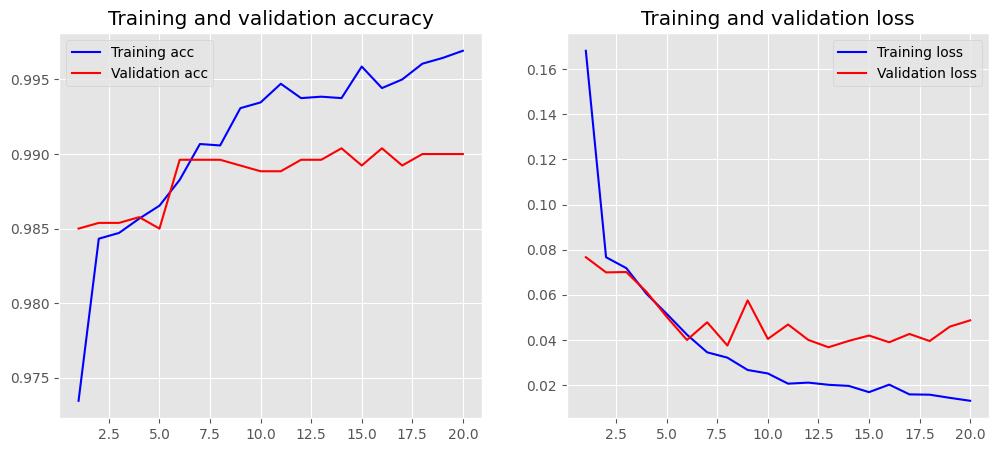

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

plot_history(history)

In [ ]:
model.evaluate(X_test, y_test)

175/175 [==============================] - 1s 6ms/step - loss: 0.0459 - accuracy: 0.9894


[0.04588272050023079, 0.9894075393676758]

In [ ]:
comments = instagram_old.Comment
encoded_comments = tokenizer.texts_to_sequences(comments)
padded_comments = pad_sequences(encoded_comments, maxlen=sentences_max_length, padding='post')

In [ ]:
np.shape(comments)

(18564,)

In [ ]:
sentiment = instagram_old.Label
sentiment = sentiment.reset_index()

In [ ]:
Pred=(model.predict(padded_comments)>0.5)

581/581 [==============================] - 3s 5ms/step


In [ ]:
num = 0
err = []
for i in tqdm(range(len(Pred)), desc="Presicion"):
  if(Pred[i] == sentiment.iloc[i,1]):
    num +=1
  if(Pred[i] != sentiment.iloc[i,1]):
    err.append(i)
presicion = num/len(sentiment)
presicion

Presicion: 100%|██████████| 18564/18564 [00:01<00:00, 13109.19it/s]


0.9941284205990089

In [ ]:
instagram_new = pd.read_excel(cp+'data/scraped_raw_instagram_datasets/instagram_new_unlabeled.xlsx').dropna()
instagram_new.head()

,Unnamed: 0,Unnamed: 1,Profile,Date created,Username,Date,Likes,Comment
0,0.0,5,@noveltycare,2022-04-06,saraa_esr,2022-04-06 17:06:42,1,بی نظیرترین❤️🙌
6,1.0,5,@noveltycare,2022-04-12,rasulishop,2022-04-12 06:35:54,1,بسیار عالی👏👏👏
10,2.0,5,@noveltycare,2022-04-20,maryam.vh,2022-04-20 06:05:20,1,☁️
34,3.0,5,@noveltycare,2022-04-27,rasulishop,2022-04-27 17:23:09,0,واقعا فوق العادست بهترین کیفیت با قیمت مناسب👏
44,4.0,5,@noveltycare,2022-05-01,rasulishop,2022-05-01 06:50:00,1,👏👏👏


In [ ]:

len(instagram_new)

469

In [ ]:


encoded_texts_new = tokenizer.texts_to_sequences(comment_new)

padded_sequence_new = pad_sequences(encoded_texts_new, maxlen=sentences_max_length, padding='post')
print('number of padded sequences and its shape:')
print(padded_sequence_new.shape)

AttributeError: ignored

In [ ]:
comments

In [ ]:
Pred_new=(model.predict(padded_sequence_new)>0.5)
instagram_new.Label = Pred_new

In [ ]:
#instagram_new.CleanComment = cleaned
instagram_new.head(2)

In [ ]:
instagram_new.to_excel('Instagram_new_fasttext_labeled.xlsx')